In [48]:
import pandas as pd

# dataset - https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop?select=2019-Nov.csv

cart_abandon_df=pd.read_csv('C:\order-conversion\\customer_session_abandoned_rate.csv', usecols=['user_id','rate'])

In [26]:
cltv_df=pd.read_csv('C:\order-conversion\\ctlv.csv',skiprows=3,names=['user_id','price_sum','price_count','price_mean','cltv'],usecols=['user_id','cltv'])

In [27]:
cart_abandon_df

,user_id,rate
0,5493470,100.0
1,6217356,100.0
2,9794320,87.5
3,10280338,50.0
4,11274156,100.0
...,...,...
95939,579916096,0.0
95940,579920781,0.0
95941,579925377,0.0
95942,579927894,0.0


In [28]:
cltv_df

,user_id,cltv
0,9794320,710.08
1,10079204,1445.36
2,10280338,3070.48
3,12055855,926.24
4,15400971,1999.76
...,...,...
72220,595367593,1701.84
72221,595372293,2382.24
72222,595373694,1110.48
72223,595376179,2603.44


In [29]:
merged_df=pd.merge(cart_abandon_df,cltv_df,on='user_id')
merged_df

,user_id,rate,cltv
0,9794320,87.500000,710.08
1,10280338,50.000000,3070.48
2,15400971,100.000000,1999.76
3,15781728,100.000000,1137.36
4,19762782,85.714286,4496.24
...,...,...,...
36939,579903865,0.000000,472.08
36940,579906406,0.000000,542.08
36941,579916096,0.000000,527.52
36942,579925377,0.000000,2140.88


In [30]:
customer_avg_df = pd.read_csv('C:\order-conversion\\average.csv',usecols=['user_id','price'])
customer_avg_df

,user_id,price
0,9794320,3.170000
1,10079204,12.905000
2,10280338,3.426875
3,15781728,10.155000
4,19762782,10.036250
...,...,...
31519,579906406,4.840000
31520,579916096,2.355000
31521,579924768,2.846667
31522,579925377,6.371667


In [31]:
merged_df=pd.merge(merged_df,customer_avg_df,on='user_id')
merged_df=merged_df[['rate','cltv','price']]
merged_df

,rate,cltv,price
0,87.500000,710.08,3.170000
1,50.000000,3070.48,3.426875
2,100.000000,1137.36,10.155000
3,85.714286,4496.24,10.036250
4,84.615385,2765.28,3.292000
...,...,...,...
31100,0.000000,472.08,8.430000
31101,0.000000,542.08,4.840000
31102,0.000000,527.52,2.355000
31103,0.000000,2140.88,6.371667


# Without Scaling

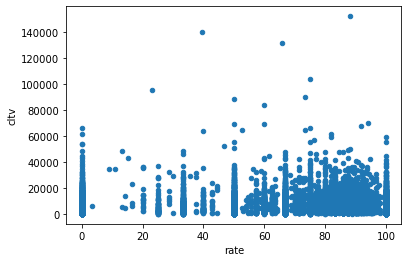

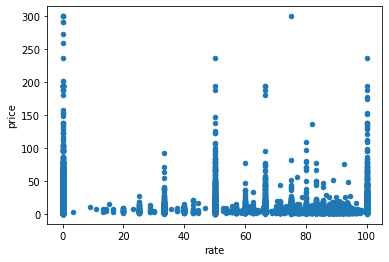

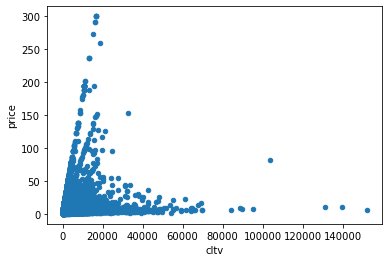

In [59]:
cols=merged_df.columns
for i in range(0,3):
    for j in range(i+1,3):
            merged_df.plot(kind='scatter',x=cols[i],y=cols[j])

# using min max scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_df[['rate','cltv','price']]=scaler.fit_transform(merged_df[['rate','cltv','price']])
merged_df

,rate,cltv,price
0,0.875000,0.004621,0.010951
1,0.500000,0.020142,0.011807
2,1.000000,0.007431,0.034240
3,0.857143,0.029517,0.033844
4,0.846154,0.018135,0.011358
...,...,...,...
31100,0.000000,0.003056,0.028489
31101,0.000000,0.003517,0.016519
31102,0.000000,0.003421,0.008234
31103,0.000000,0.014029,0.021626


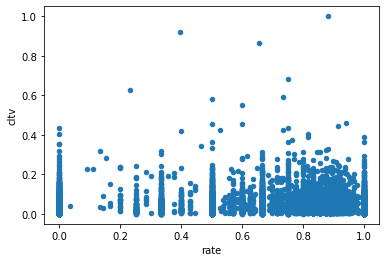

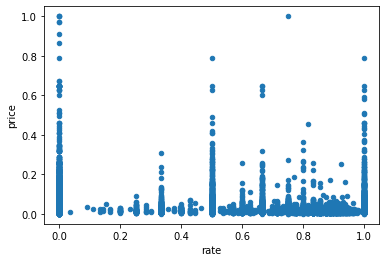

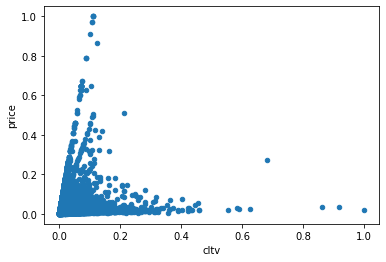

In [14]:
cols=merged_df.columns
for i in range(0,3):
    for j in range(i+1,3):
            merged_df.plot(kind='scatter',x=cols[i],y=cols[j])

# using standard scaling

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_df[['rate','cltv','price']]=scaler.fit_transform(merged_df[['rate','cltv','price']])
merged_df

,rate,cltv,price
0,1.029634,-0.592429,-0.350487
1,0.079331,-0.126727,-0.329842
2,1.346401,-0.508128,0.210874
3,0.984381,0.154572,0.201331
4,0.956534,-0.186943,-0.340682
...,...,...,...
31100,-1.187739,-0.639386,0.072242
31101,-1.187739,-0.625575,-0.216274
31102,-1.187739,-0.628448,-0.415986
31103,-1.187739,-0.310135,-0.093179


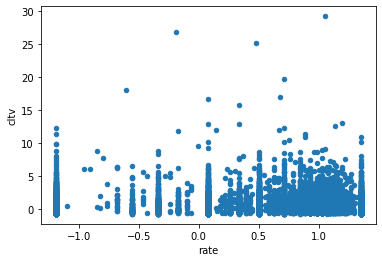

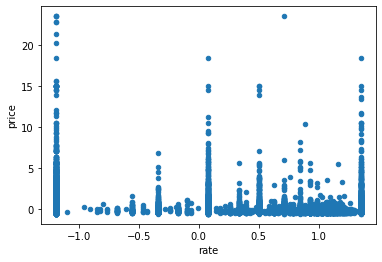

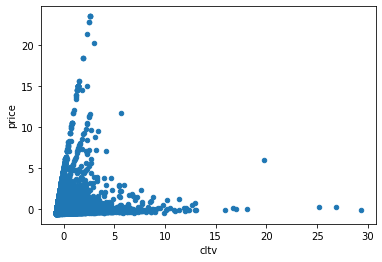

In [33]:
cols=merged_df.columns
for i in range(0,3):
    for j in range(i+1,3):
            merged_df.plot(kind='scatter',x=cols[i],y=cols[j])

<AxesSubplot:xlabel='rate', ylabel='user_id'>

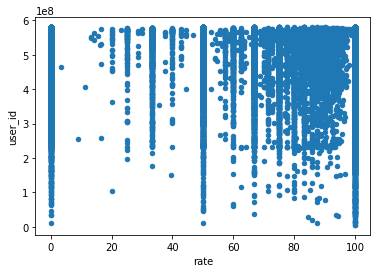

In [37]:
cart_abandon_df.plot(kind='scatter',x='rate',y='user_id')

In [41]:
cart_abandon_df.groupby('rate').count().sort_values('user_id')

,user_id
rate,
84.482759,1
89.189189,1
88.636364,1
87.179487,1
87.096774,1
...,...
75.000000,1766
66.666667,3022
50.000000,5812


In [49]:
cart_abandon_df=cart_abandon_df[(cart_abandon_df['rate']>60)]
cart_abandon_df

,user_id,rate
0,5493470,100.0
1,6217356,100.0
2,9794320,87.5
4,11274156,100.0
5,13117447,100.0
...,...,...
81212,579959455,100.0
81213,579959992,100.0
81214,579962565,100.0
81215,579962710,100.0


<AxesSubplot:xlabel='rate', ylabel='user_id'>

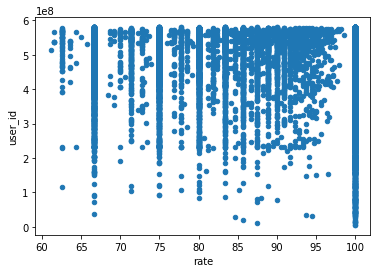

In [50]:
cart_abandon_df.plot(kind='scatter',x='rate',y='user_id')